In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Take a look at the structure of csv file!

ang = pd.read_csv('angles_xray.csv') # read angles from a csv file into a Dataframe
sns.set_context('notebook') # set seaborn general style for figures

C:\Users\illya\AppData\Local\Temp\ipykernel_20560\2311677794.py:152: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axins.grid(visible=False, which='major', axis='both', c='#d9e2e6', lw=0.5)


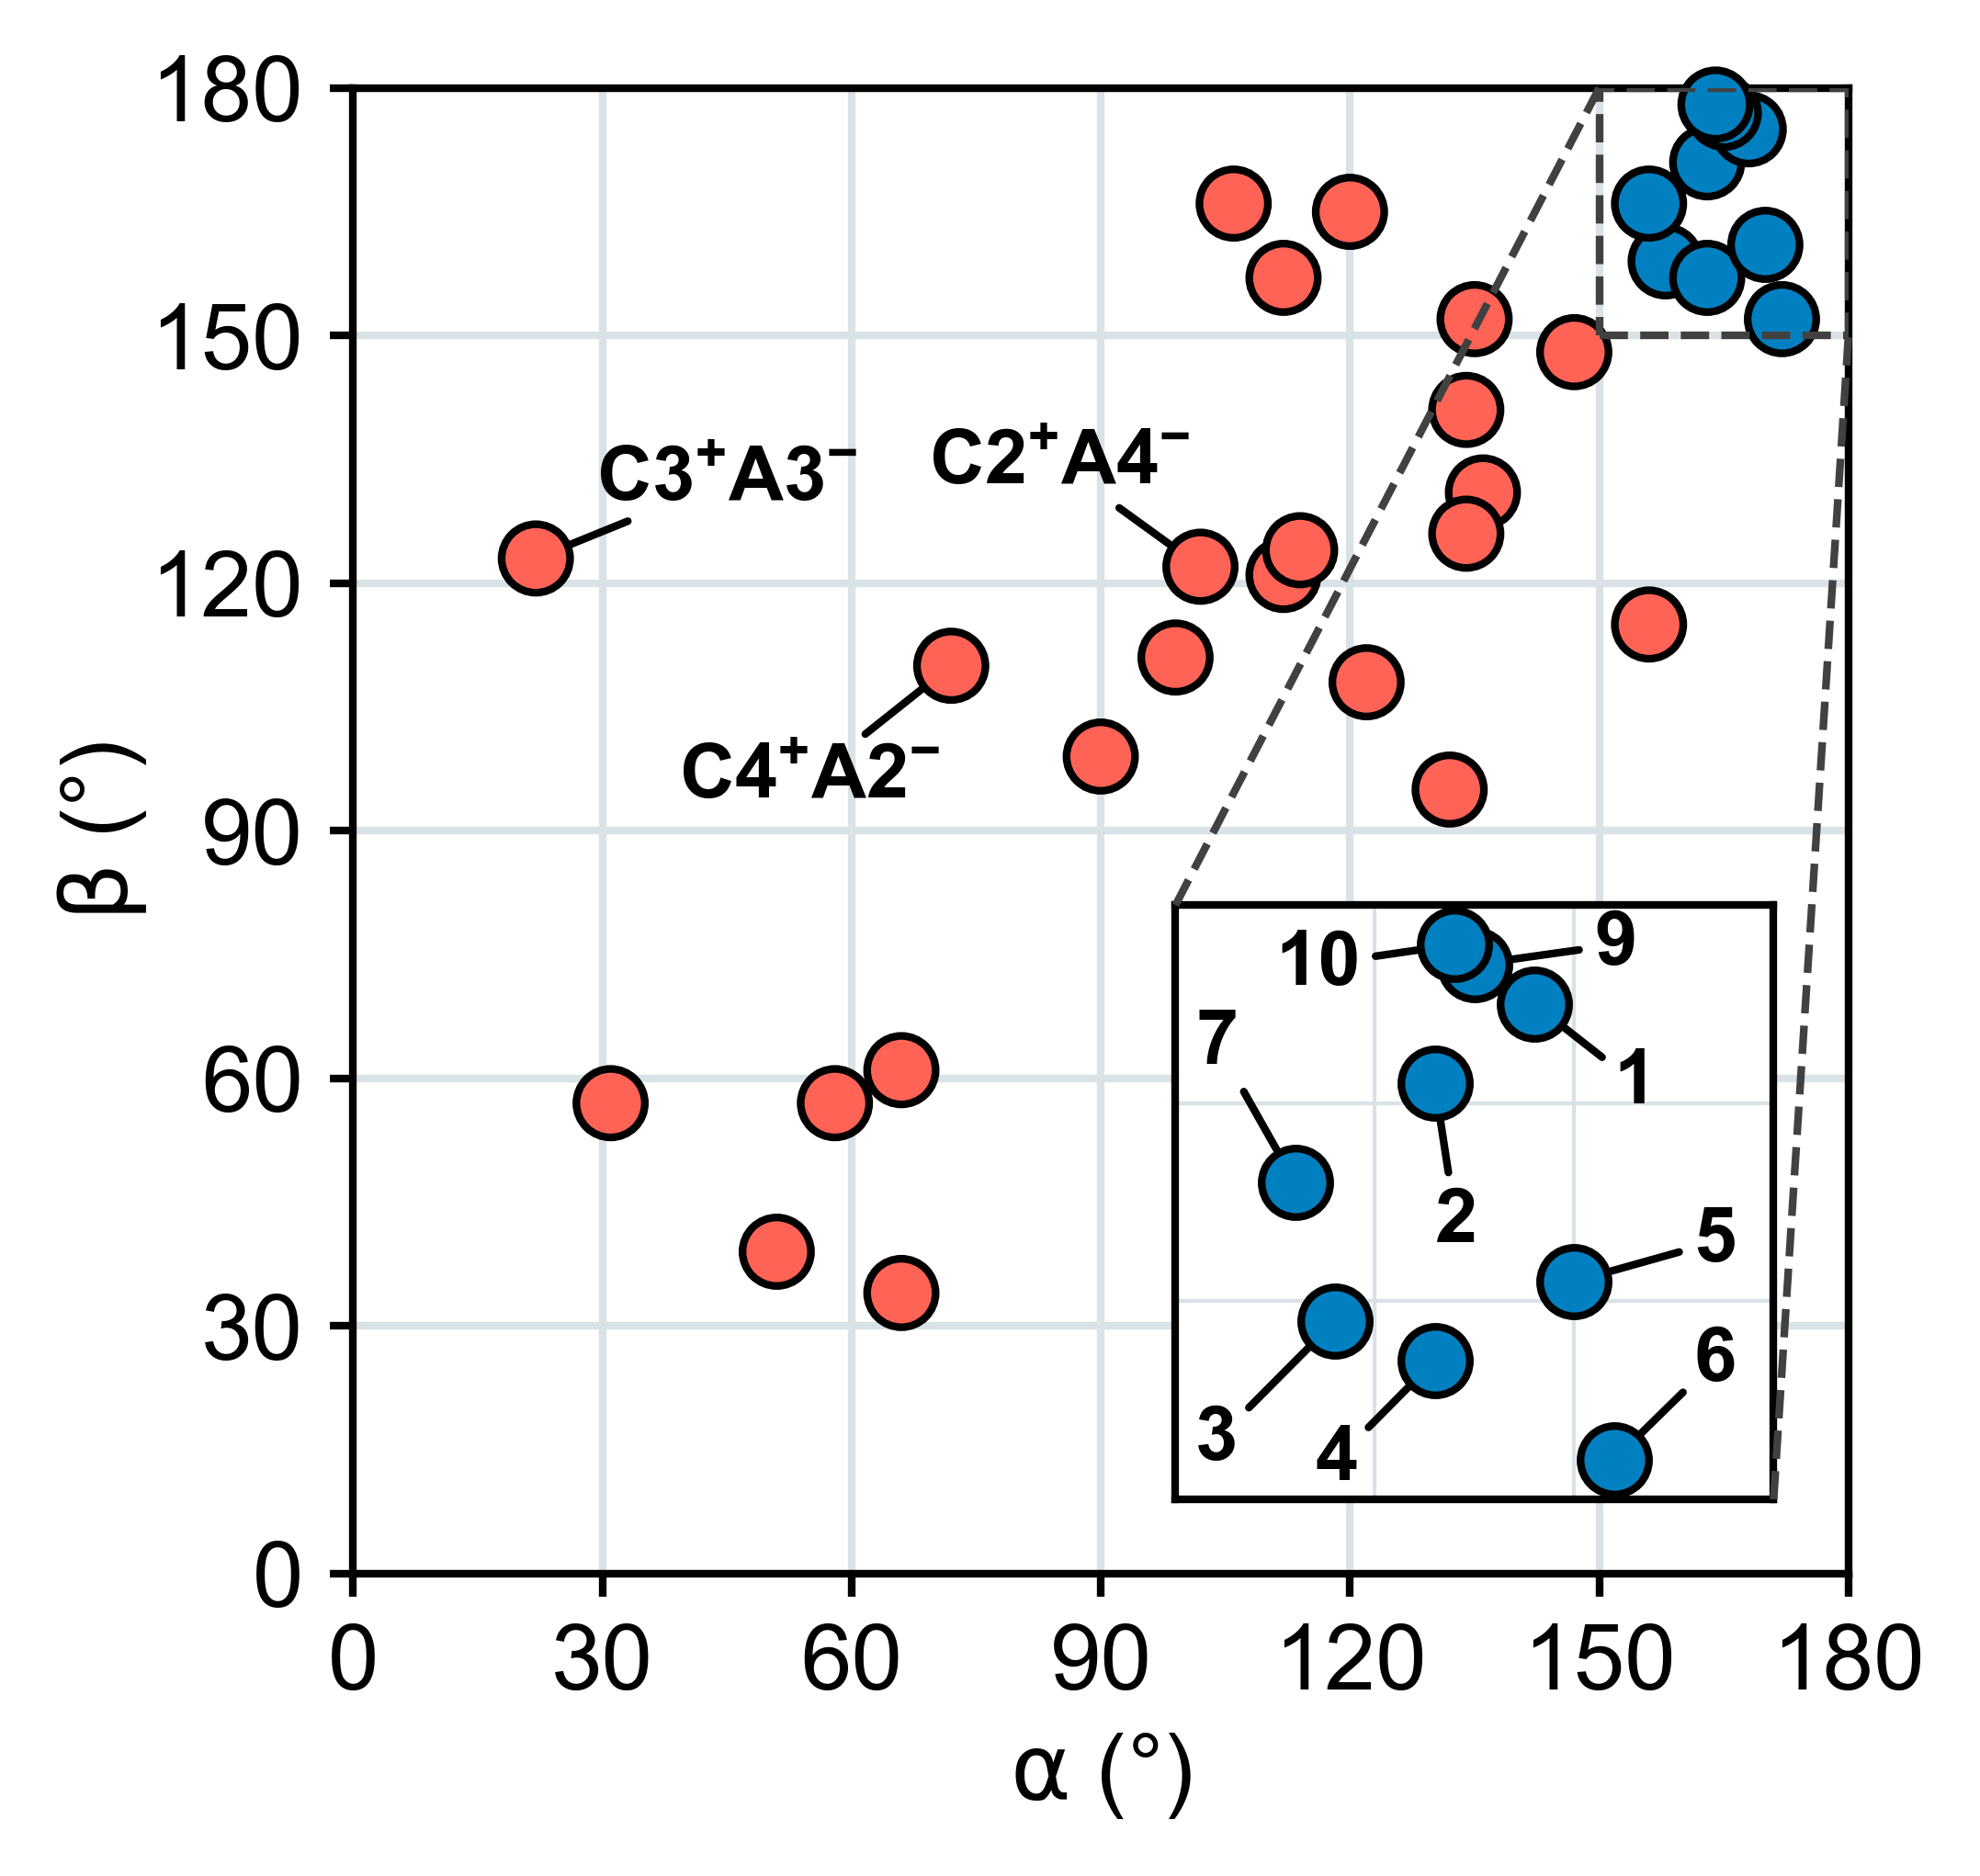

In [2]:

fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=600)

colors = {'pairs': '#0080c0', 'control': '#fe6356'} # colors for data points - pair corresponds to directional, control - not
sns.scatterplot(data=ang,
                x='alpha',
                y='beta',
                s = 80,
                c=ang['mask'].map(colors), # use to map colors to corresponding data points
                edgecolor='#000000', # literally - edge color, black in this case. If you want hollow point, set facecolor to None.
                linewidth=1, # lw of the edge
                zorder=5, # z-order is technically order of elements along z-axis, if you want to bring smth to the top, increase it.
                clip_on=False)

"""
Everything with plt.rcParams[""] sets global variables, so it should be done once in the whole code. I have it in every cell just because 
I copy-pasted this cell. Check matplotlib documentation to find what these parameters mean.
"""

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "arial"
plt.rcParams["mathtext.fontset"] = 'custom'
plt.rcParams["mathtext.default"] = 'rm'
plt.rcParams["mathtext.bf"] = 'sans:bold'
plt.rcParams["mathtext.rm"] = 'serif'


fonts = {'fontsize': 12} # probably could be specified in rcParams too


plt.xlabel(r'$\alpha$ (°)', **fonts, labelpad=3) # label of the x axis.
plt.ylabel(r'$\beta$ (°)', **fonts, labelpad=0.15) # label of the y axis.

ax.grid(visible=True, which='major', axis='both', lw=1, c='#d9e2e6') # grid

ax.set_axisbelow(True)

"""Parameters of the ticks below"""

plt.tick_params(axis='both', which='major', labelsize=12, length=3, width=1) 

ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.set_yticks([0, 30, 60, 90, 120, 150, 180])


plt.legend([], [], frameon=False) #legend is empty, I think seaborn will try to insert it anyways if you don't write this here

"""Parameters of spines below, just linewidth"""

ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

"""Limits of the plot, from 0 to 180 degrees obviously"""
plt.xlim(0, 180)
plt.ylim(0, 180)

"""The lables are different from the rest of the plot, so I had to specify them here. Otherwise, parameters from the rcParams apply"""

label_fonts = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}

"""Parameters of the arrows from label to a point"""

arrowprops={'arrowstyle': '-',
            'alpha': 1,
            'lw': 1,
            'color': '#000000',
            'shrinkB': 5}

"""
Actual labels. You insert them with plt.annotate(). Read the documentation, but in short, the first parameter is actual text of the label
The second is the coordinates OF THE DATA POINT, third - coordinates OF THE LABEL - we set it manually too, but if omited - matplotlib
will insert it at some default place. ha is allignment, then fonts, then arrows. bbox is just for alignment with arrow (accepts only dictionary,
therefore it looks so weird).
"""

plt.annotate(r'C3$^\mathbf{+}$A3$^\mathbf{-}$', (22, 123), xytext=(45, 130), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

plt.annotate(r'C2$^\mathbf{+}$A4$^\mathbf{-}$', (102, 122), xytext=(85, 132), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

plt.annotate(r'C4$^\mathbf{+}$A2$^\mathbf{-}$', (72, 110), xytext=(55, 94), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


# __________________________________subplot below________________________________


"""Limits of the subplot"""

x1 = 150
x2 = 180
y1 = 150
y2 = 180

"""
This is a bit confusing. We insert the subplot with ax.insert_axes(). Inside there are four numbers that represent lower-left 
corner of inset axes, and its width and height. 0.55,0.05 - means that the bottom left corner will be at 55% of with and 5% of the height,
0.4 and 0.4 - are with and height, again in percentage of the total width and height.
axins.axis - receives a list with limits along x and along y, WHICH WILL BE SHOWN IN THE SUBPLOT.
"""
axins = ax.inset_axes((0.55,0.05,.4,.4))
axins.axis([x1, x2, y1, y2]) 


axins.scatter(ang['alpha'], ang['beta'], s=80, color='#0080c0', marker='o', linewidth=1, edgecolors='black') # plot our subplot

# again ticks
axins.tick_params(left=False,
                  bottom=False,
                  labelleft=False,
                  labelbottom=False,
                  )
""" 
If you want to have ticks insed, replace the code above with
axins.tick_params(axis='both', which='both', length=3, width=0.3, labelsize=10, pad=2)

"""

# spines
axins.spines['left'].set_linewidth(1)
axins.spines['top'].set_linewidth(1)
axins.spines['right'].set_linewidth(1)
axins.spines['bottom'].set_linewidth(1)

"""
You can make them dashed by using this:

axins.spines['left'].set_linestyle('dashed')
axins.spines['top'].set_linestyle('dashed')
axins.spines['right'].set_linestyle('dashed')
axins.spines['bottom'].set_linestyle('dashed')

"""


axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='#414141', ls='--', lw=1, zorder=5) # that is how you show this "zoom"


"""
A bit of trickery - I want to have nice grid, so I need to have ticks. I disabled them before, so they will not appear
but the grid line will start from these numbers.
You can try to remove these set_xticks and see what happens with the grid.

"""
axins.set_xticks([150, 160, 170, 180])
axins.set_yticks([150, 160, 170, 180])
axins.grid(visible=False, which='major', axis='both', c='#d9e2e6', lw=0.5)

axins.set_axisbelow(True)


# labels and annotations 
label_fonts_ins = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
arrowprops_ins={'arrowstyle': '-',
            'alpha': 1,
            'lw': 1,
            'color': '#000000',
            'shrinkB': 5}

axins.annotate('3', (158, 159), xytext=(151, 152), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('2', (163, 171), xytext=(163, 163), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('4', (163, 157), xytext=(157, 151), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('5', (170, 161), xytext=(176, 162), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('6', (172, 152), xytext=(176, 156), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('1', (168, 175), xytext=(172, 170), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('7', (156, 166), xytext=(151, 172), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('9', (165, 177), xytext=(171, 177), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('10', (164, 178), xytext=(155, 176), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


plt.savefig('./23-10.svg', format='svg', dpi=600, bbox_inches='tight') # save our figure
plt.show()


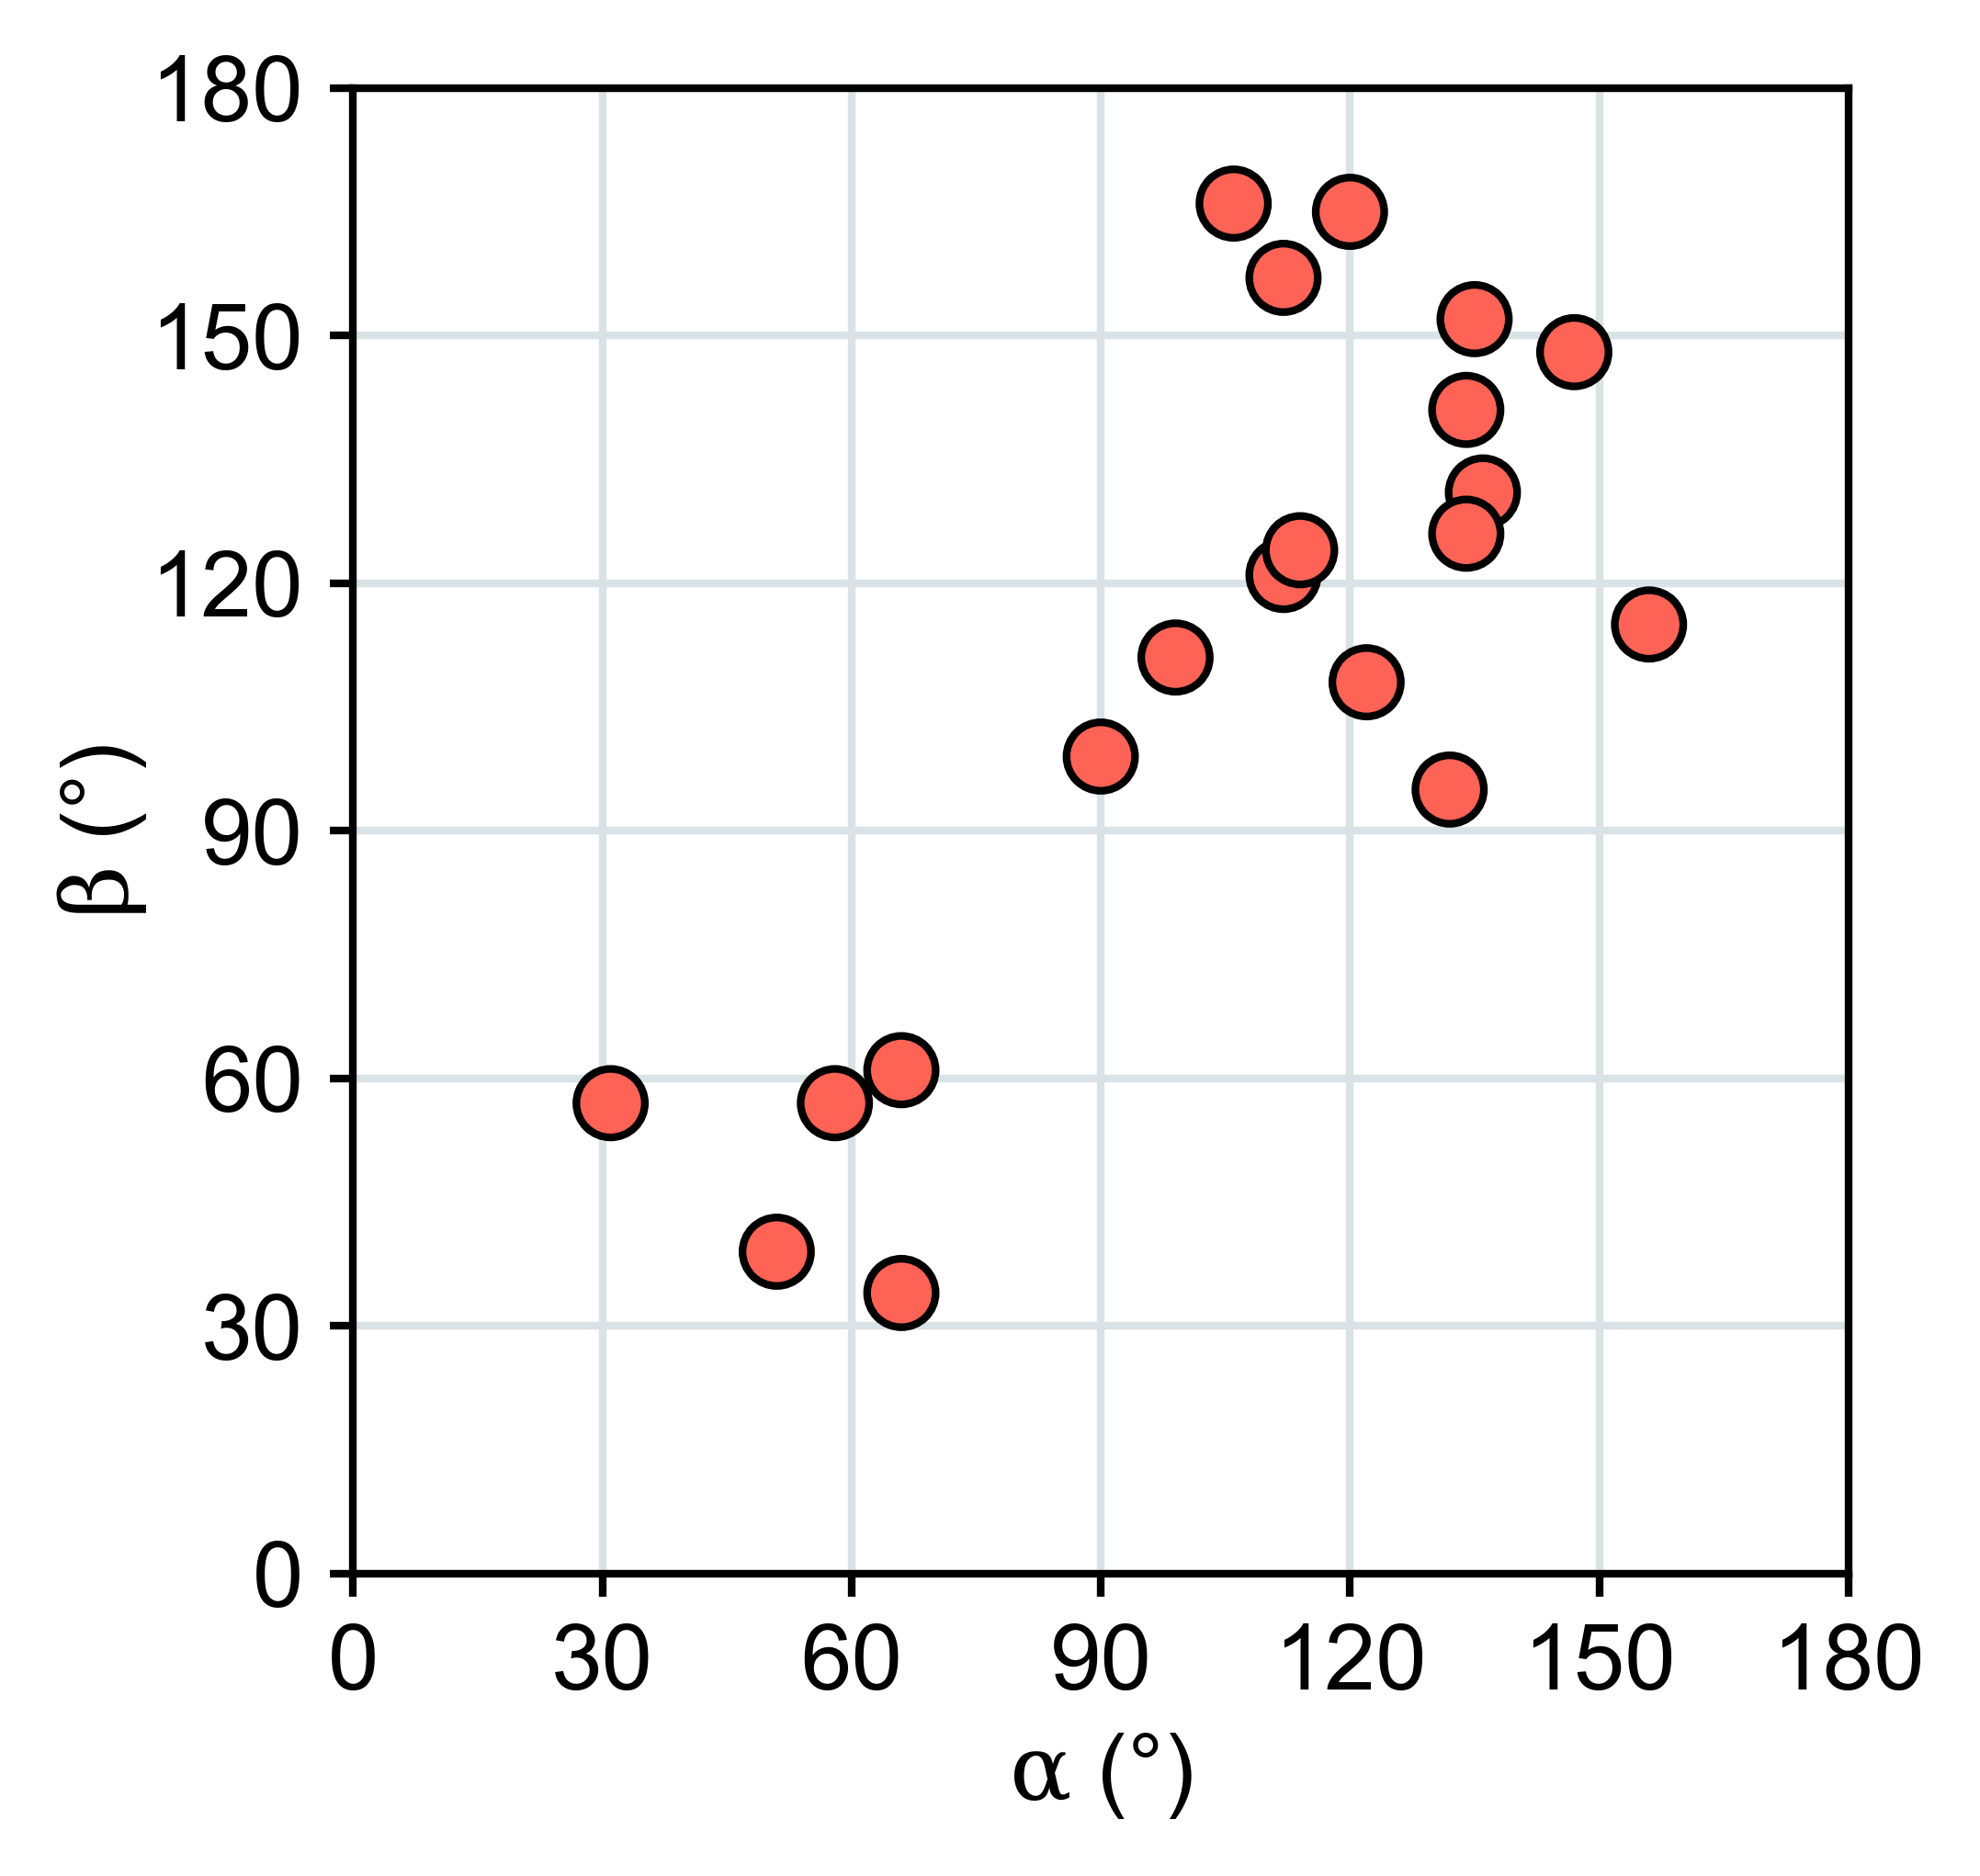

In [3]:
ang = pd.read_csv('angles_1.csv')

fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=600)

colors = {'pairs': '#0080c0', 'control': '#fe6356'}
sns.scatterplot(data=ang,
                x='alpha',
                y='beta',
                s = 80,
                c=ang['mask'].map(colors),
                edgecolor='#000000',
                linewidth=1,
                zorder=5,
                clip_on=False)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "arial"
plt.rcParams["mathtext.fontset"] = 'custom'
plt.rcParams["mathtext.default"] = 'rm'
plt.rcParams["mathtext.bf"] = 'sans:bold'
plt.rcParams["mathtext.rm"] = 'serif'
fonts = {'fontsize': 12}
plt.xlabel(r'$\alpha$ (°)', **fonts, labelpad=3)
plt.ylabel(r'$\beta$ (°)', **fonts, labelpad=0.15)

ax.grid(visible=True, which='major', axis='both', lw=1, c='#d9e2e6')

ax.set_axisbelow(True)

plt.tick_params(axis='both', which='major', labelsize=12, length=3, width=1)

ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.set_yticks([0, 30, 60, 90, 120, 150, 180])

plt.legend([], [], frameon=False)

ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.xlim(0, 180)
plt.ylim(0, 180)

label_fonts = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
arrowprops={'arrowstyle': '-',
            'alpha': 1,
            'lw': 1,
            'color': '#000000',
            'shrinkB': 5}

# plt.annotate(r'C3$^\mathbf{+}$A3$^\mathbf{-}$', (22, 123), xytext=(45, 130), ha='center', **label_fonts, arrowprops=arrowprops, 
#             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# plt.annotate(r'C2$^\mathbf{+}$A4$^\mathbf{-}$', (102, 122), xytext=(85, 132), ha='center', **label_fonts, arrowprops=arrowprops, 
#             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# plt.annotate(r'C4$^\mathbf{+}$A2$^\mathbf{-}$', (72, 110), xytext=(55, 94), ha='center', **label_fonts, arrowprops=arrowprops, 
#             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


# __________________________________subplot below________________________________

# x1 = 150
# x2 = 180
# y1 = 150
# y2 = 180

# axins = ax.inset_axes((0.55,0.05,.4,.4))
# axins.axis([x1, x2, y1, y2])

# # axins = zoomed_inset_axes(ax, 2, loc=4, bbox_to_anchor=(0.89, 0.2), bbox_transform=ax.figure.transFigure)
# axins.scatter(ang['alpha'], ang['beta'], s=80, color='#0080c0', marker='o', linewidth=1, edgecolors='black')


# axins.tick_params(left=False,
#                   bottom=False,
#                   labelleft=False,
#                   labelbottom=False,
#                   )
# axins.tick_params(axis='both', which='both', length=3, width=0.3, labelsize=10, pad=2)


# axins.spines['left'].set_linewidth(1)
# axins.spines['top'].set_linewidth(1)
# axins.spines['right'].set_linewidth(1)
# axins.spines['bottom'].set_linewidth(1)

# # axins.spines['left'].set_linestyle('dashed')
# # axins.spines['top'].set_linestyle('dashed')
# # axins.spines['right'].set_linestyle('dashed')
# # axins.spines['bottom'].set_linestyle('dashed')

# axins.set_xticks([150, 160, 170, 180])

# axins.set_yticks([150, 160, 170, 180])

# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)

# mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='#414141', ls='--', lw=1, zorder=5)

# axins.grid(visible=False, which='major', axis='both', c='#d9e2e6', lw=0.5)
# axins.set_axisbelow(True)

# label_fonts_ins = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
# arrowprops_ins={'arrowstyle': '-',
#             'alpha': 1,
#             'lw': 1,
#             'color': '#000000',
#             'shrinkB': 5}

# axins.annotate('3', (158, 159), xytext=(151, 152), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('2', (163, 171), xytext=(163, 163), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('4', (163, 157), xytext=(157, 151), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('5', (170, 161), xytext=(176, 162), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('6', (172, 152), xytext=(176, 156), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('1', (168, 175), xytext=(172, 170), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('7', (156, 166), xytext=(151, 172), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('9', (165, 177), xytext=(171, 177), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('10', (164, 178), xytext=(155, 176), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


plt.savefig('./ccdc.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

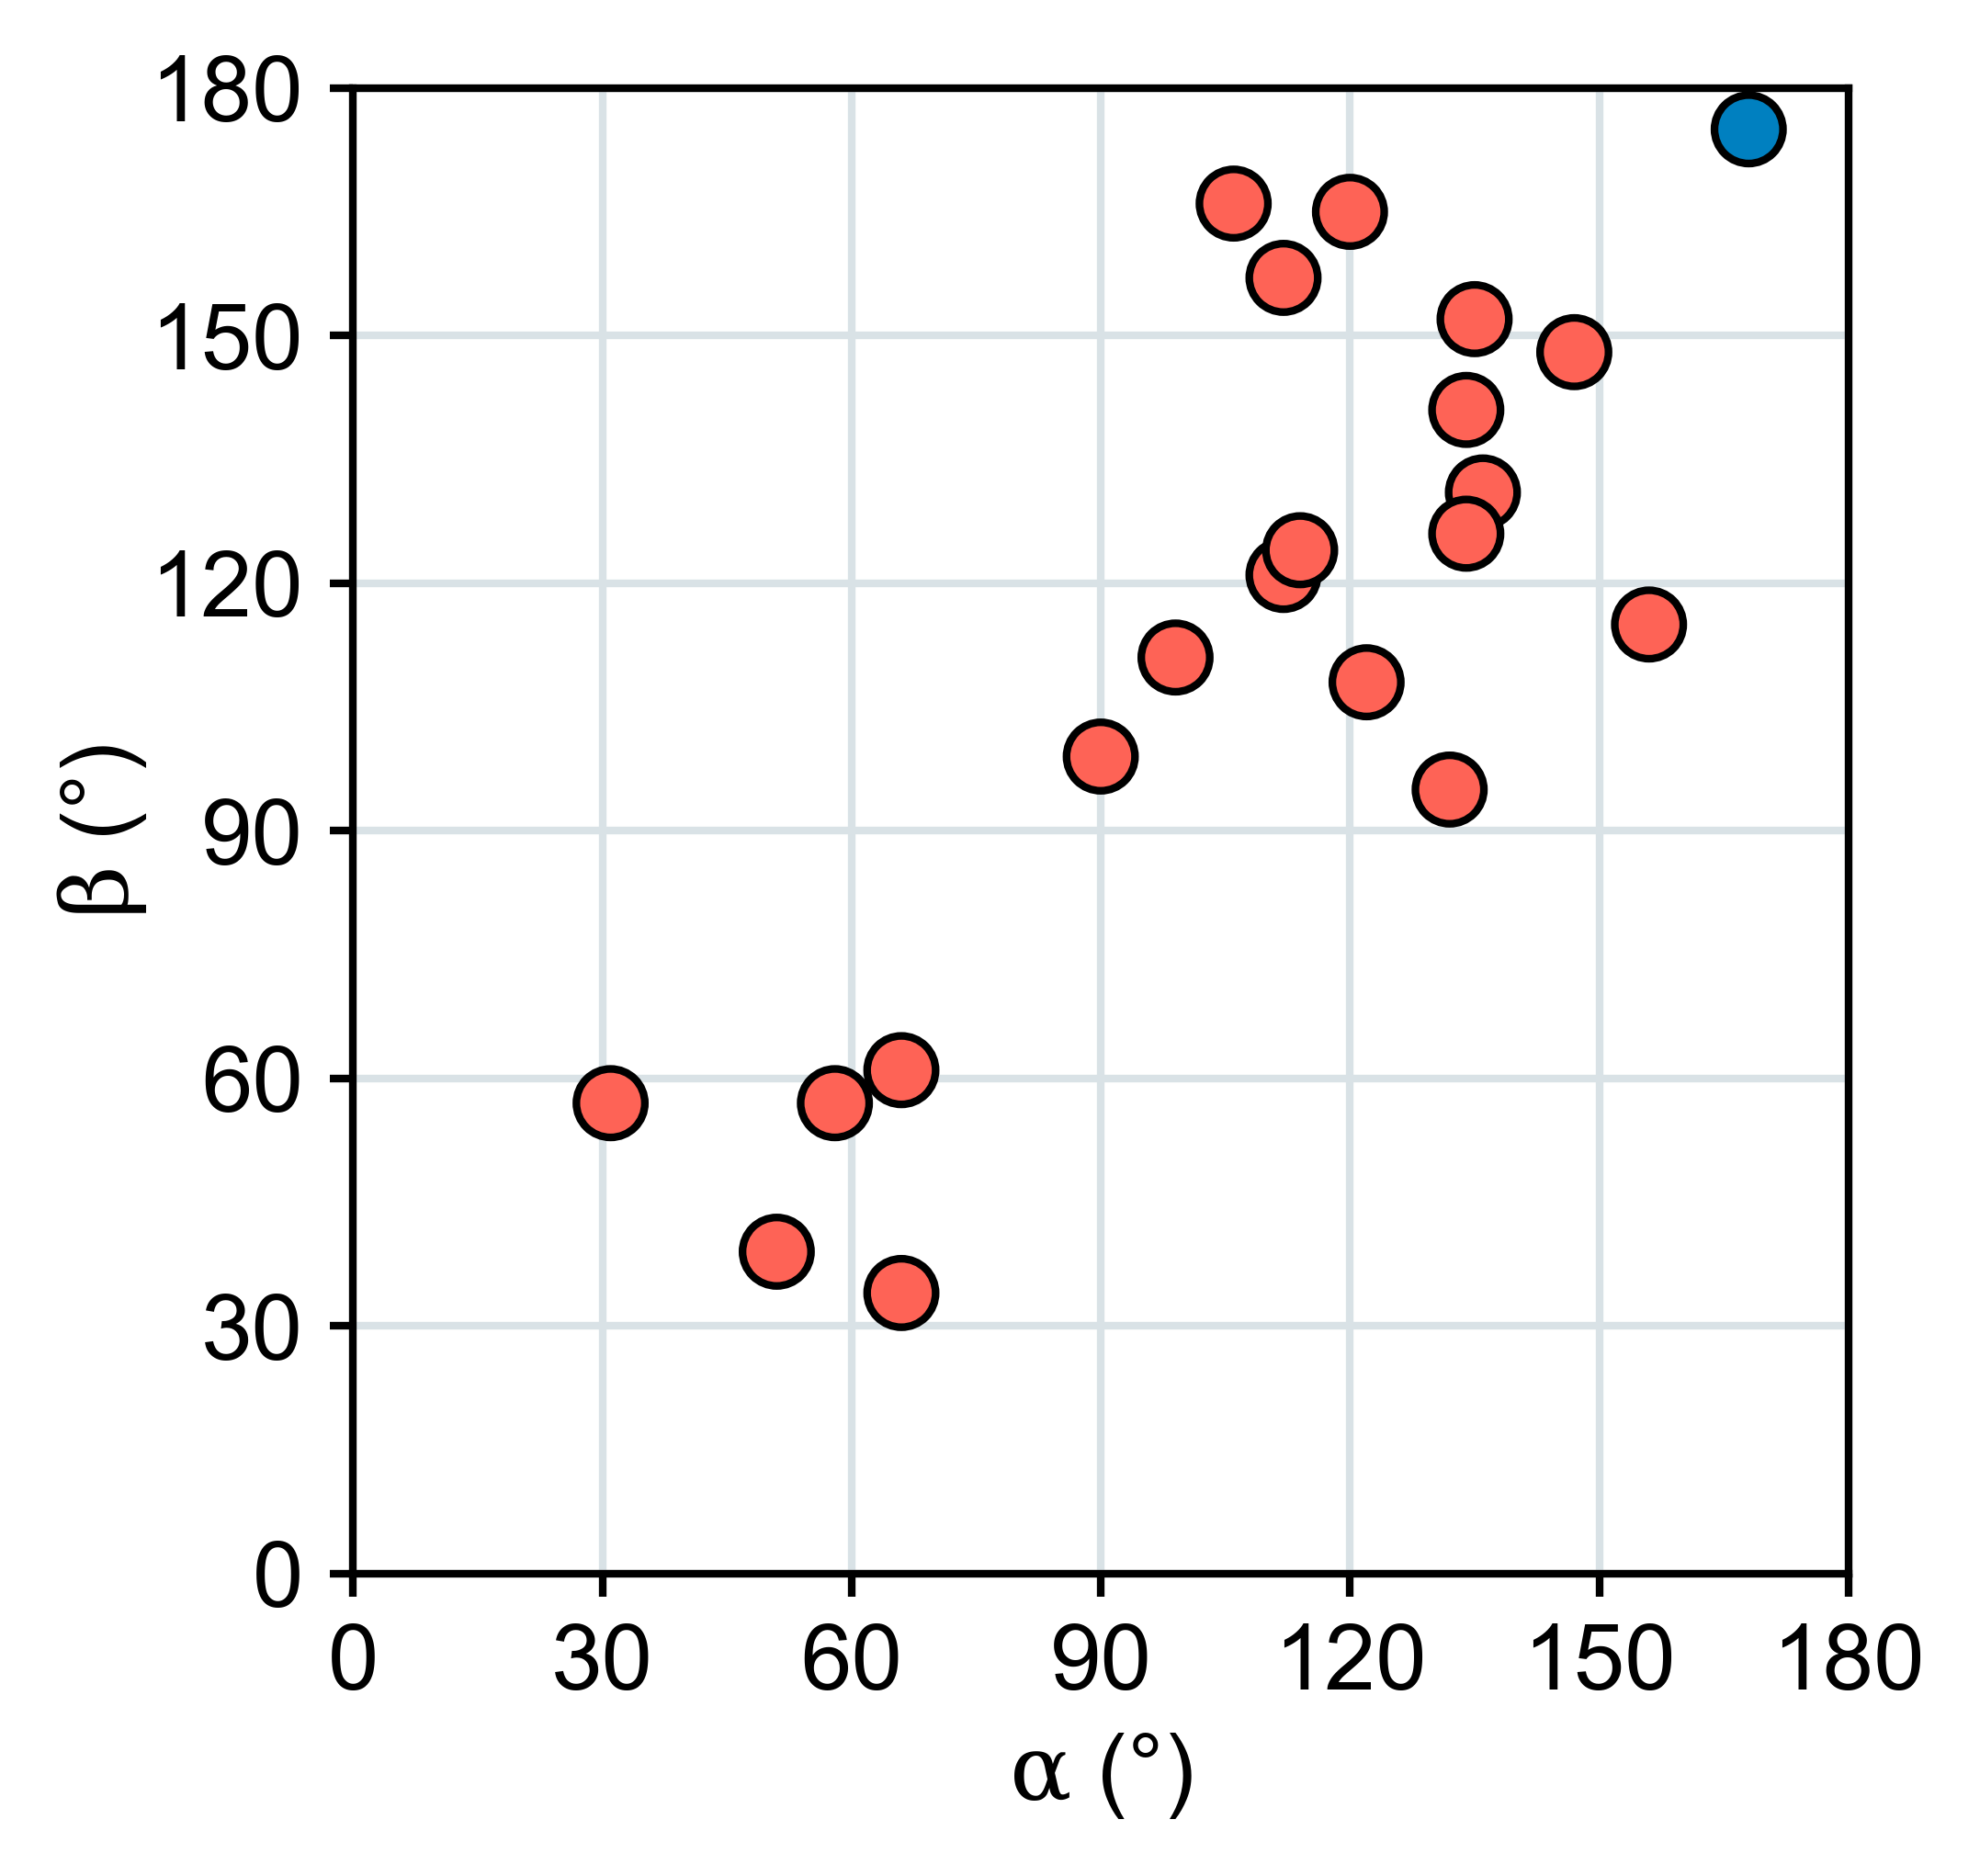

In [4]:
ang = pd.read_csv('angles_2.csv')


fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=600)

colors = {'pairs': '#0080c0', 'control': '#fe6356'}
sns.scatterplot(data=ang,
                x='alpha',
                y='beta',
                s = 80,
                c=ang['mask'].map(colors),
                edgecolor='#000000',
                linewidth=1,
                zorder=5,
                clip_on=False)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "arial"
plt.rcParams["mathtext.fontset"] = 'custom'
plt.rcParams["mathtext.default"] = 'rm'
plt.rcParams["mathtext.bf"] = 'sans:bold'
plt.rcParams["mathtext.rm"] = 'serif'
fonts = {'fontsize': 12}
plt.xlabel(r'$\alpha$ (°)', **fonts, labelpad=3)
plt.ylabel(r'$\beta$ (°)', **fonts, labelpad=0.15)

ax.grid(visible=True, which='major', axis='both', lw=1, c='#d9e2e6')

ax.set_axisbelow(True)

plt.tick_params(axis='both', which='major', labelsize=12, length=3, width=1)

ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.set_yticks([0, 30, 60, 90, 120, 150, 180])

plt.legend([], [], frameon=False)

ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.xlim(0, 180)
plt.ylim(0, 180)

label_fonts = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
arrowprops={'arrowstyle': '-',
            'alpha': 1,
            'lw': 1,
            'color': '#000000',
            'shrinkB': 5}

# plt.annotate(r'C3$^\mathbf{+}$A3$^\mathbf{-}$', (22, 123), xytext=(45, 130), ha='center', **label_fonts, arrowprops=arrowprops, 
#             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# plt.annotate(r'C2$^\mathbf{+}$A4$^\mathbf{-}$', (102, 122), xytext=(85, 132), ha='center', **label_fonts, arrowprops=arrowprops, 
#             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# plt.annotate(r'C4$^\mathbf{+}$A2$^\mathbf{-}$', (72, 110), xytext=(55, 94), ha='center', **label_fonts, arrowprops=arrowprops, 
#             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


# __________________________________subplot below________________________________

# x1 = 150
# x2 = 180
# y1 = 150
# y2 = 180

# axins = ax.inset_axes((0.55,0.05,.4,.4))
# axins.axis([x1, x2, y1, y2])

# # axins = zoomed_inset_axes(ax, 2, loc=4, bbox_to_anchor=(0.89, 0.2), bbox_transform=ax.figure.transFigure)
# axins.scatter(ang['alpha'], ang['beta'], s=80, color='#0080c0', marker='o', linewidth=1, edgecolors='black')


# axins.tick_params(left=False,
#                   bottom=False,
#                   labelleft=False,
#                   labelbottom=False,
#                   )
# axins.tick_params(axis='both', which='both', length=3, width=0.3, labelsize=10, pad=2)


# axins.spines['left'].set_linewidth(1)
# axins.spines['top'].set_linewidth(1)
# axins.spines['right'].set_linewidth(1)
# axins.spines['bottom'].set_linewidth(1)

# # axins.spines['left'].set_linestyle('dashed')
# # axins.spines['top'].set_linestyle('dashed')
# # axins.spines['right'].set_linestyle('dashed')
# # axins.spines['bottom'].set_linestyle('dashed')

# axins.set_xticks([150, 160, 170, 180])

# axins.set_yticks([150, 160, 170, 180])

# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)

# mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='#414141', ls='--', lw=1, zorder=5)

# axins.grid(visible=False, which='major', axis='both', c='#d9e2e6', lw=0.5)
# axins.set_axisbelow(True)

# label_fonts_ins = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
# arrowprops_ins={'arrowstyle': '-',
#             'alpha': 1,
#             'lw': 1,
#             'color': '#000000',
#             'shrinkB': 5}

# axins.annotate('3', (158, 159), xytext=(151, 152), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('2', (163, 171), xytext=(163, 163), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('4', (163, 157), xytext=(157, 151), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('5', (170, 161), xytext=(176, 162), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('6', (172, 152), xytext=(176, 156), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('1', (168, 175), xytext=(172, 170), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('7', (156, 166), xytext=(151, 172), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('9', (165, 177), xytext=(171, 177), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('10', (164, 178), xytext=(155, 176), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


plt.savefig('./one.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

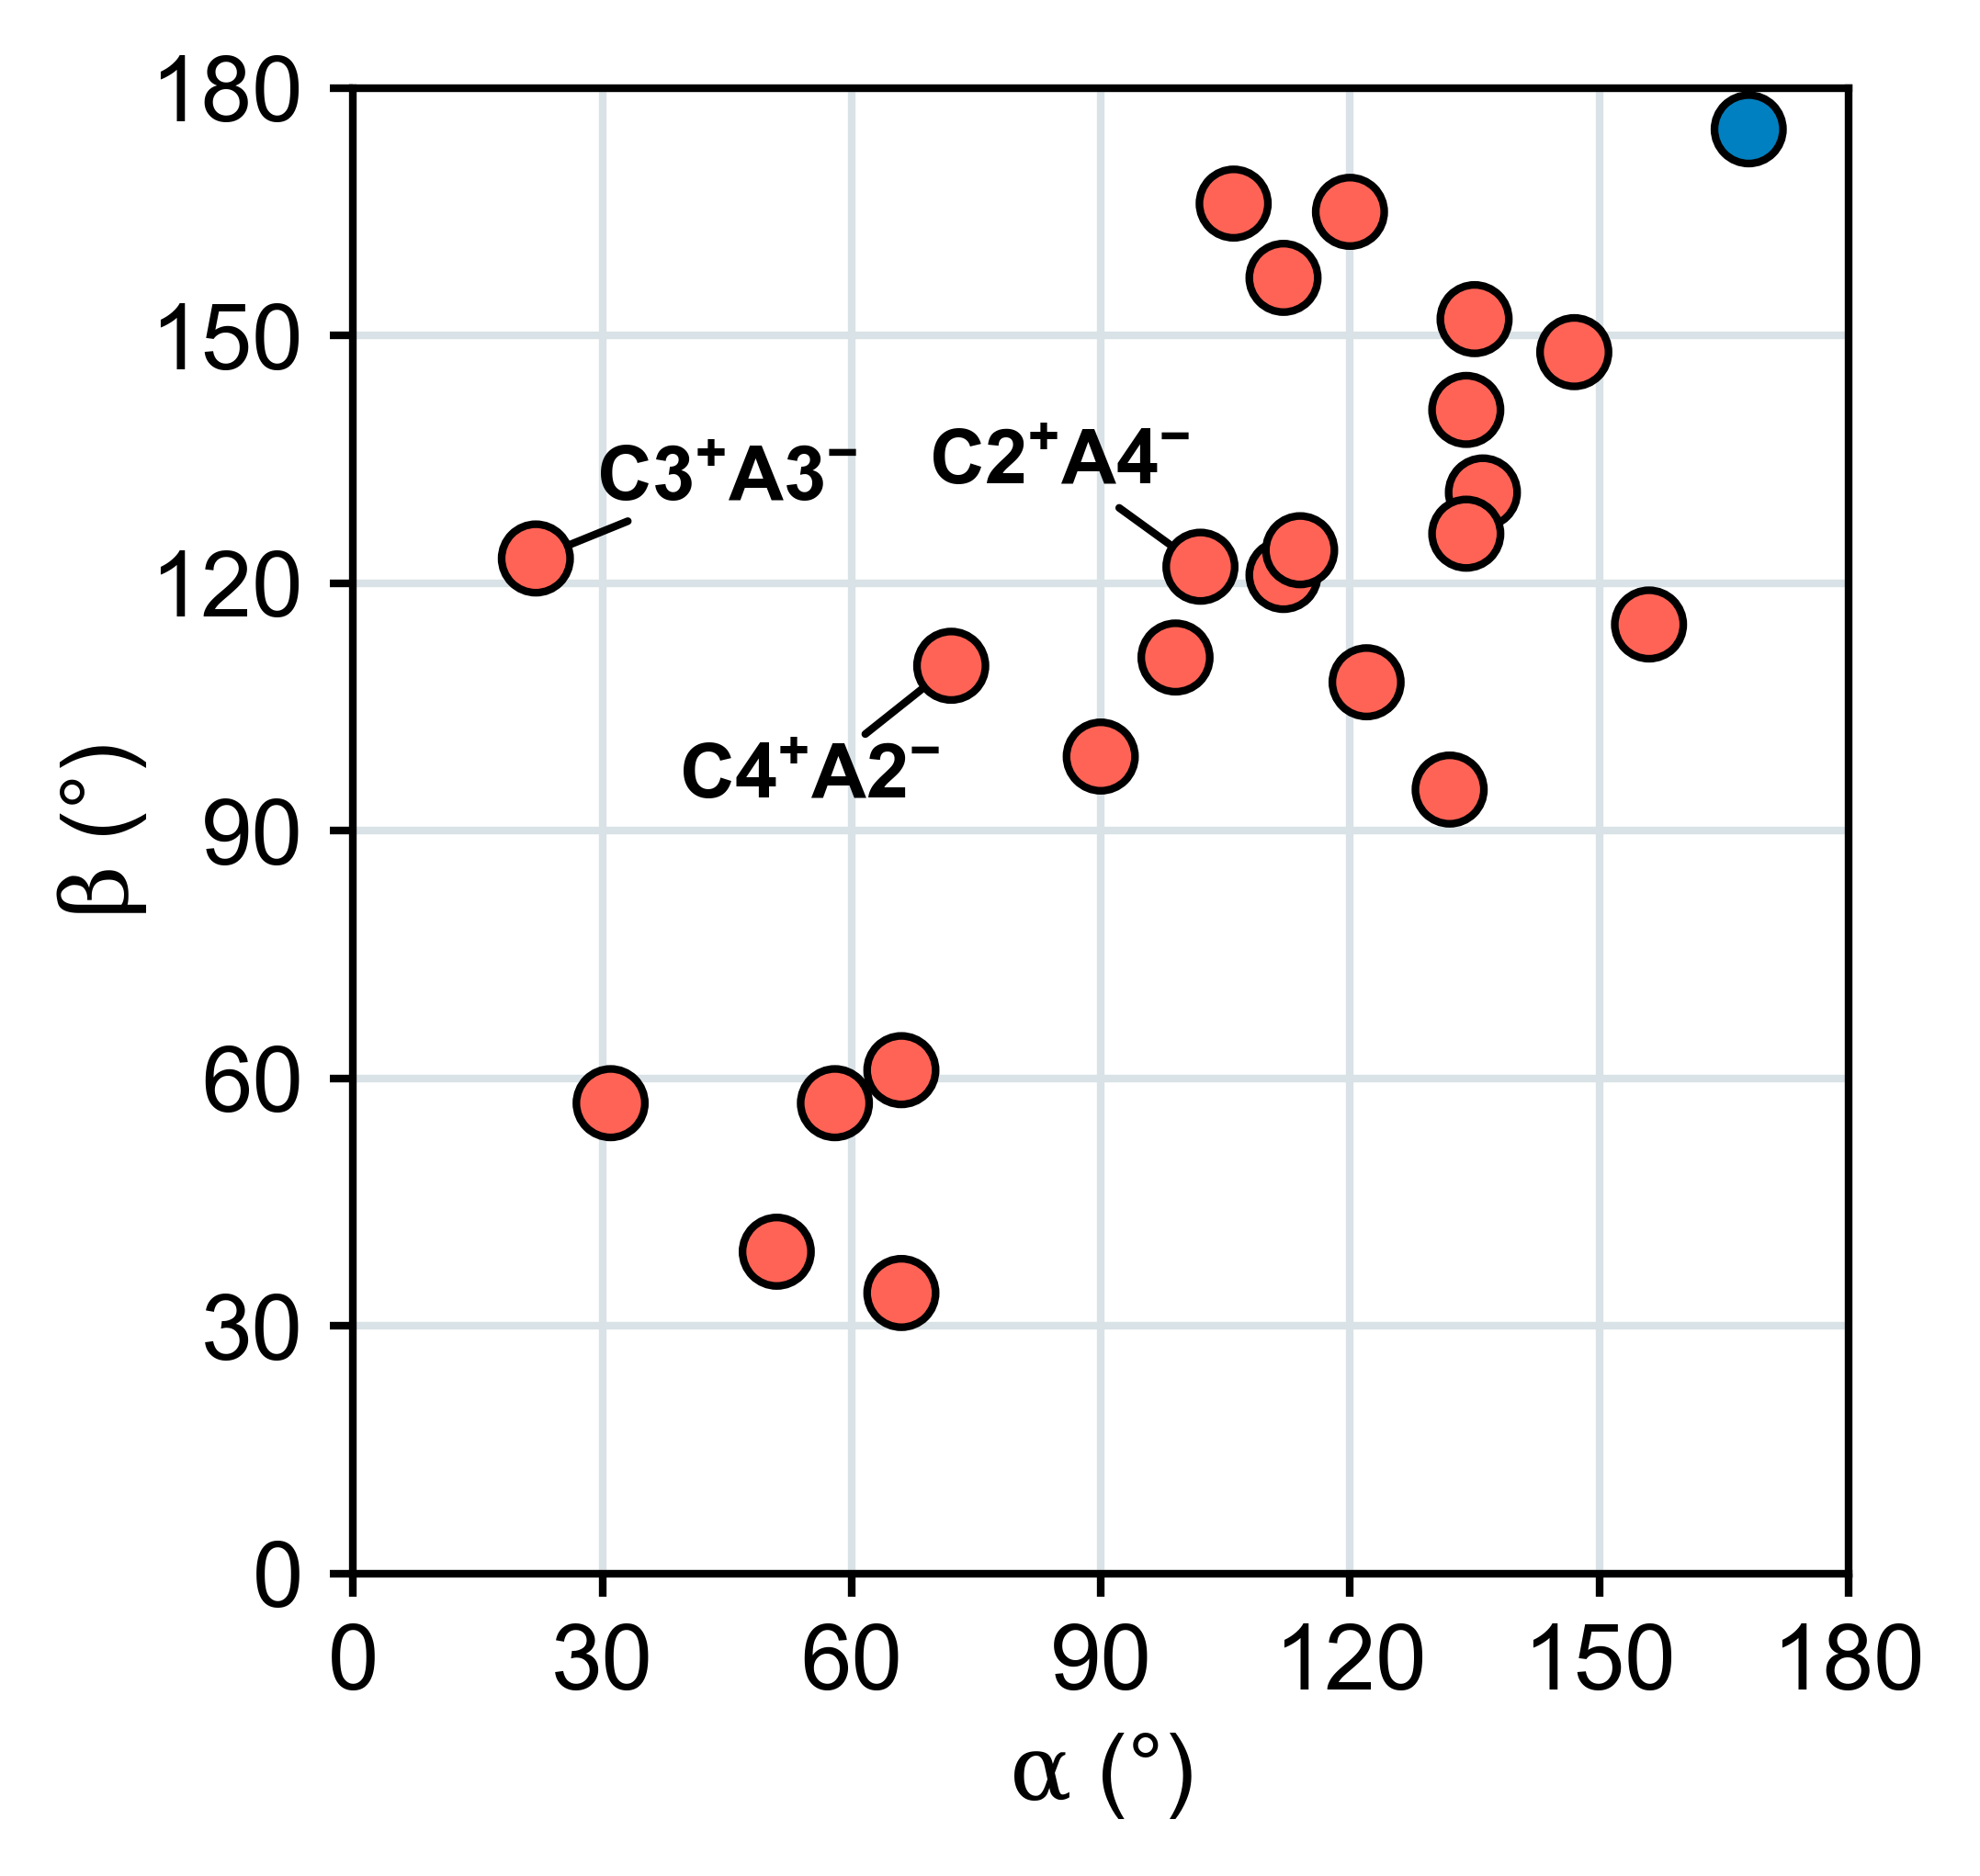

In [5]:
ang = pd.read_csv('angles_3.csv')


fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=600)

colors = {'pairs': '#0080c0', 'control': '#fe6356'}
sns.scatterplot(data=ang,
                x='alpha',
                y='beta',
                s = 80,
                c=ang['mask'].map(colors),
                edgecolor='#000000',
                linewidth=1,
                zorder=5,
                clip_on=False)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "arial"
plt.rcParams["mathtext.fontset"] = 'custom'
plt.rcParams["mathtext.default"] = 'rm'
plt.rcParams["mathtext.bf"] = 'sans:bold'
plt.rcParams["mathtext.rm"] = 'serif'
fonts = {'fontsize': 12}
plt.xlabel(r'$\alpha$ (°)', **fonts, labelpad=3)
plt.ylabel(r'$\beta$ (°)', **fonts, labelpad=0.15)

ax.grid(visible=True, which='major', axis='both', lw=1, c='#d9e2e6')

ax.set_axisbelow(True)

plt.tick_params(axis='both', which='major', labelsize=12, length=3, width=1)

ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.set_yticks([0, 30, 60, 90, 120, 150, 180])

plt.legend([], [], frameon=False)

ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.xlim(0, 180)
plt.ylim(0, 180)

label_fonts = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
arrowprops={'arrowstyle': '-',
            'alpha': 1,
            'lw': 1,
            'color': '#000000',
            'shrinkB': 5}

plt.annotate(r'C3$^\mathbf{+}$A3$^\mathbf{-}$', (22, 123), xytext=(45, 130), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

plt.annotate(r'C2$^\mathbf{+}$A4$^\mathbf{-}$', (102, 122), xytext=(85, 132), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

plt.annotate(r'C4$^\mathbf{+}$A2$^\mathbf{-}$', (72, 110), xytext=(55, 94), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


# __________________________________subplot below________________________________

# x1 = 150
# x2 = 180
# y1 = 150
# y2 = 180

# axins = ax.inset_axes((0.55,0.05,.4,.4))
# axins.axis([x1, x2, y1, y2])

# # axins = zoomed_inset_axes(ax, 2, loc=4, bbox_to_anchor=(0.89, 0.2), bbox_transform=ax.figure.transFigure)
# axins.scatter(ang['alpha'], ang['beta'], s=80, color='#0080c0', marker='o', linewidth=1, edgecolors='black')


# axins.tick_params(left=False,
#                   bottom=False,
#                   labelleft=False,
#                   labelbottom=False,
#                   )
# axins.tick_params(axis='both', which='both', length=3, width=0.3, labelsize=10, pad=2)


# axins.spines['left'].set_linewidth(1)
# axins.spines['top'].set_linewidth(1)
# axins.spines['right'].set_linewidth(1)
# axins.spines['bottom'].set_linewidth(1)

# # axins.spines['left'].set_linestyle('dashed')
# # axins.spines['top'].set_linestyle('dashed')
# # axins.spines['right'].set_linestyle('dashed')
# # axins.spines['bottom'].set_linestyle('dashed')

# axins.set_xticks([150, 160, 170, 180])

# axins.set_yticks([150, 160, 170, 180])

# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)

# mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='#414141', ls='--', lw=1, zorder=5)

# axins.grid(visible=False, which='major', axis='both', c='#d9e2e6', lw=0.5)
# axins.set_axisbelow(True)

# label_fonts_ins = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
# arrowprops_ins={'arrowstyle': '-',
#             'alpha': 1,
#             'lw': 1,
#             'color': '#000000',
#             'shrinkB': 5}

# axins.annotate('3', (158, 159), xytext=(151, 152), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('2', (163, 171), xytext=(163, 163), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('4', (163, 157), xytext=(157, 151), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('5', (170, 161), xytext=(176, 162), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('6', (172, 152), xytext=(176, 156), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('1', (168, 175), xytext=(172, 170), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('7', (156, 166), xytext=(151, 172), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('9', (165, 177), xytext=(171, 177), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('10', (164, 178), xytext=(155, 176), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


plt.savefig('./control.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

C:\Users\illya\AppData\Local\Temp\ipykernel_20560\1578117646.py:104: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axins.grid(visible=False, which='major', axis='both', c='#d9e2e6', lw=0.5)


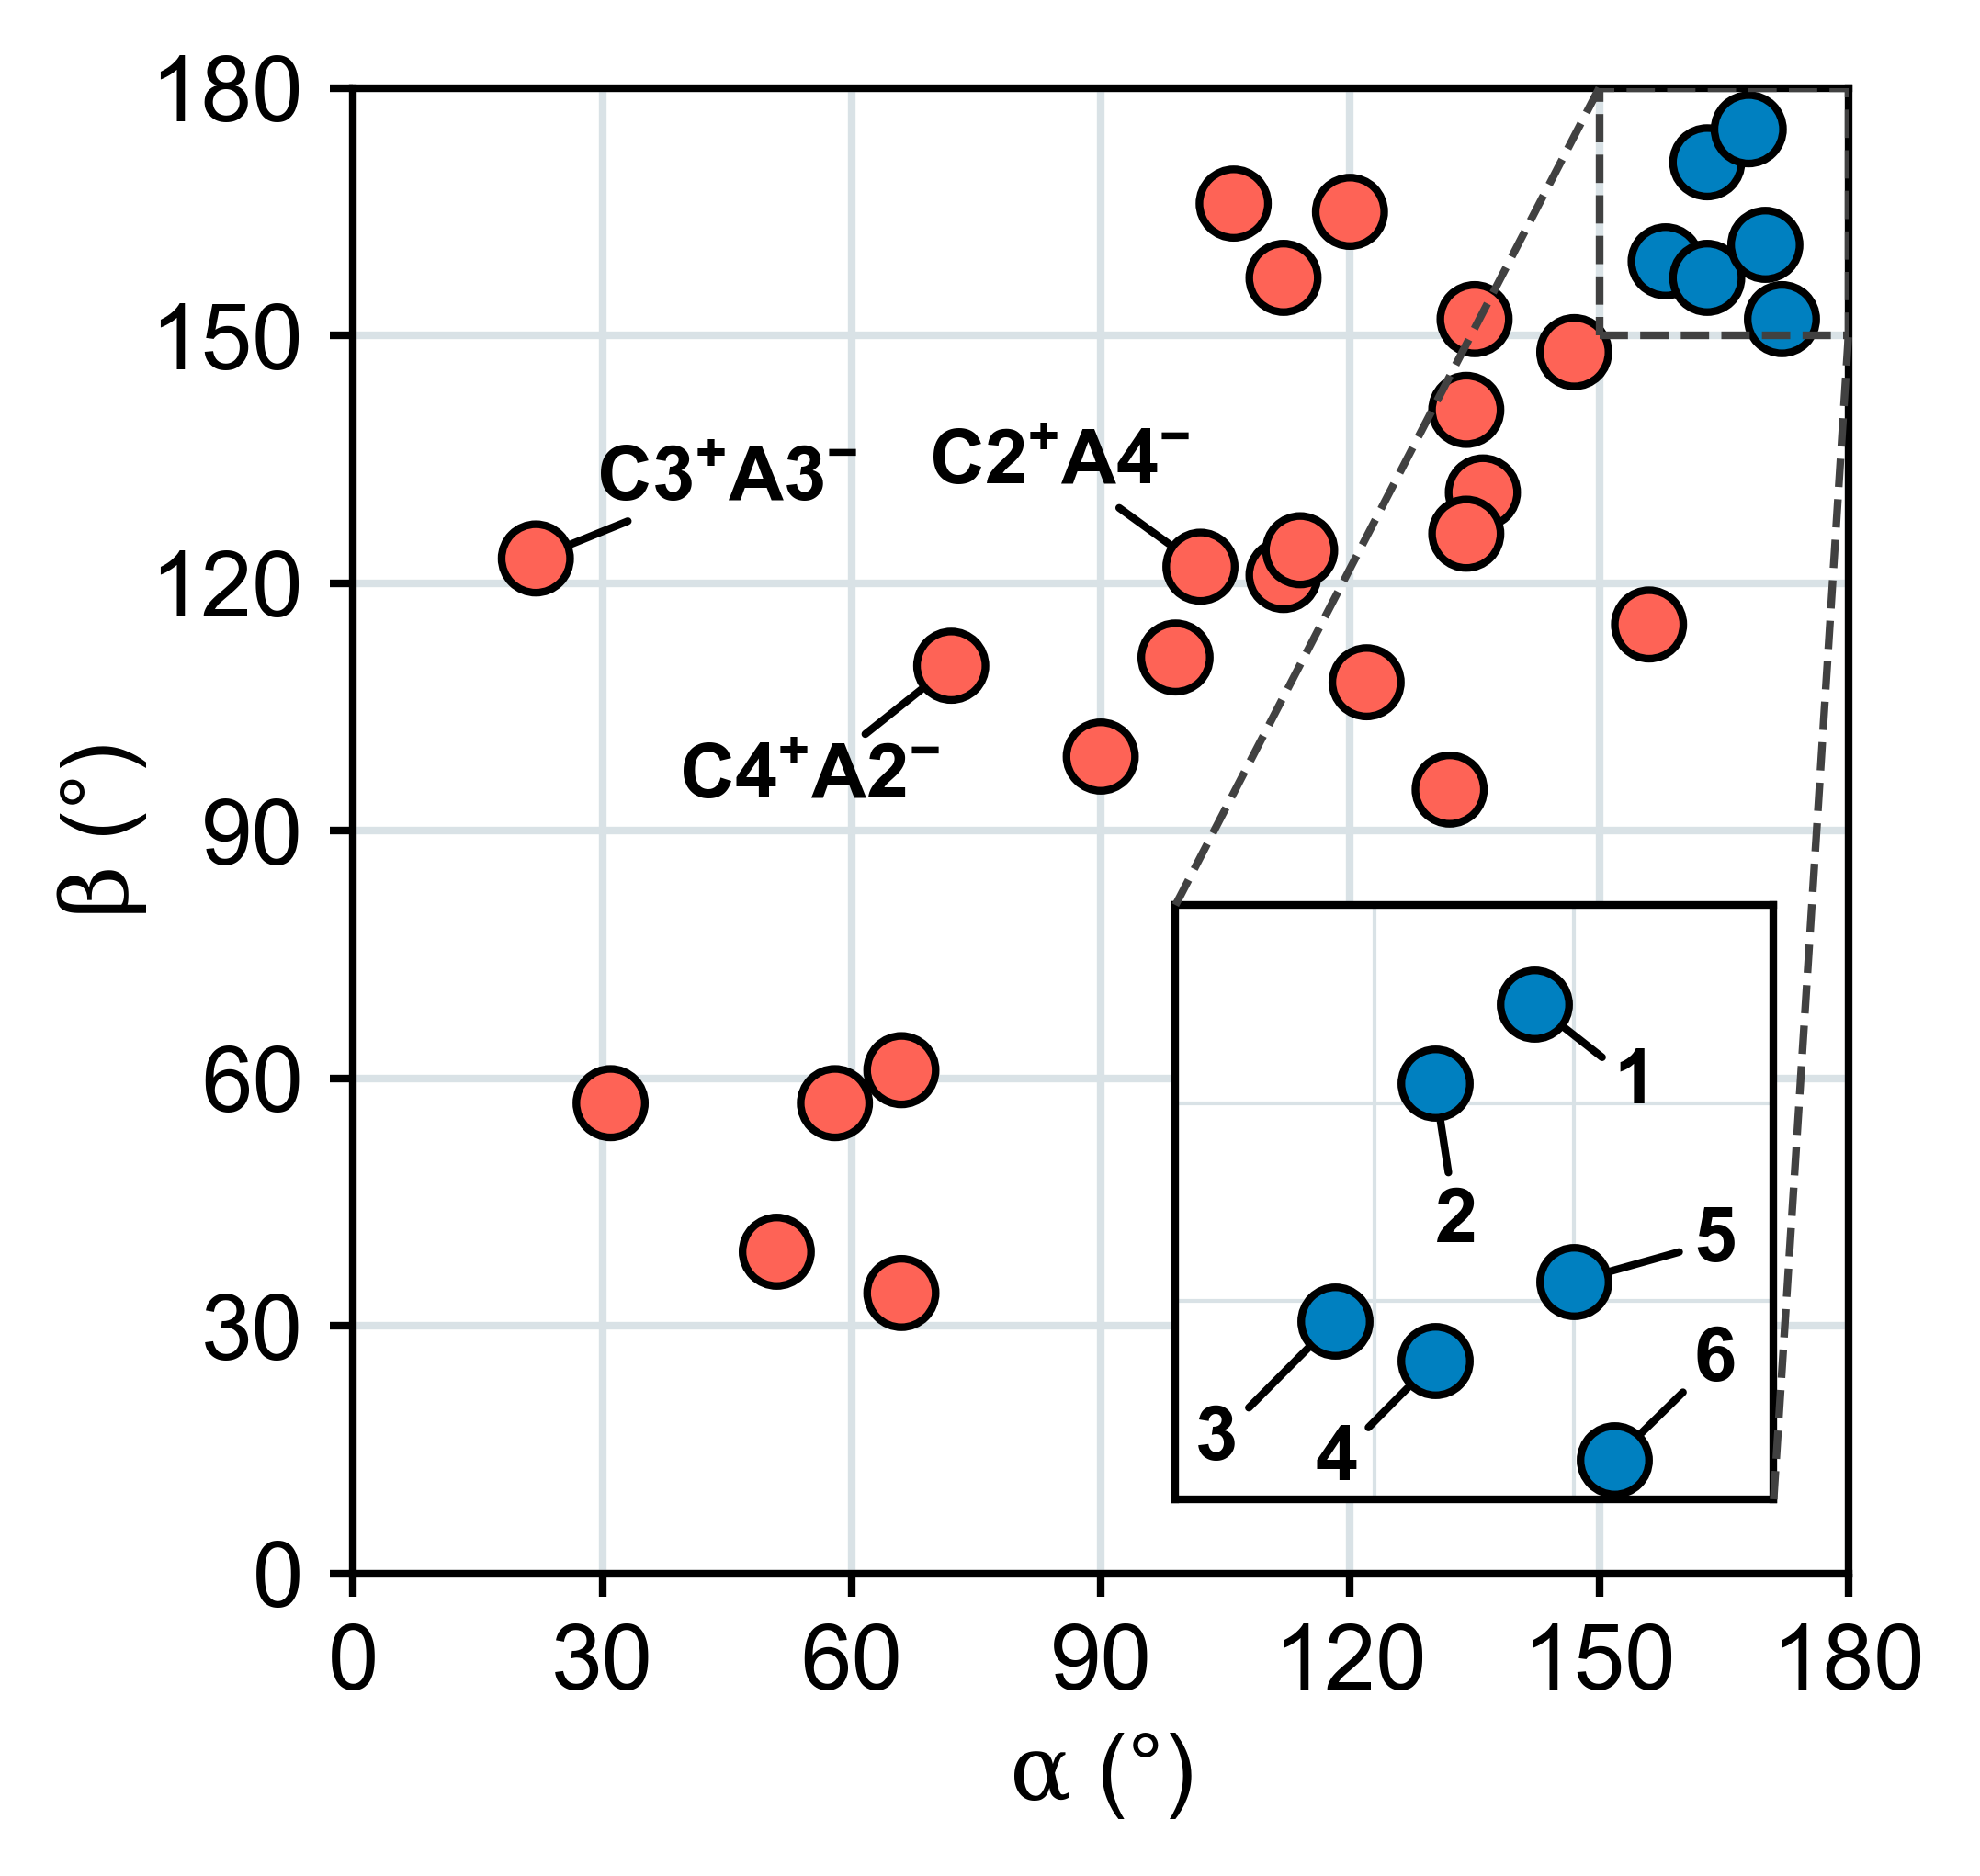

In [6]:
ang = pd.read_csv('angles_4.csv')


fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=600)

colors = {'pairs': '#0080c0', 'control': '#fe6356'}
sns.scatterplot(data=ang,
                x='alpha',
                y='beta',
                s = 80,
                c=ang['mask'].map(colors),
                edgecolor='#000000',
                linewidth=1,
                zorder=5,
                clip_on=False)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "arial"
plt.rcParams["mathtext.fontset"] = 'custom'
plt.rcParams["mathtext.default"] = 'rm'
plt.rcParams["mathtext.bf"] = 'sans:bold'
plt.rcParams["mathtext.rm"] = 'serif'
fonts = {'fontsize': 12}
plt.xlabel(r'$\alpha$ (°)', **fonts, labelpad=3)
plt.ylabel(r'$\beta$ (°)', **fonts, labelpad=0.15)

ax.grid(visible=True, which='major', axis='both', lw=1, c='#d9e2e6')

ax.set_axisbelow(True)

plt.tick_params(axis='both', which='major', labelsize=12, length=3, width=1)

ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.set_yticks([0, 30, 60, 90, 120, 150, 180])

plt.legend([], [], frameon=False)

ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.xlim(0, 180)
plt.ylim(0, 180)

label_fonts = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
arrowprops={'arrowstyle': '-',
            'alpha': 1,
            'lw': 1,
            'color': '#000000',
            'shrinkB': 5}

plt.annotate(r'C3$^\mathbf{+}$A3$^\mathbf{-}$', (22, 123), xytext=(45, 130), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

plt.annotate(r'C2$^\mathbf{+}$A4$^\mathbf{-}$', (102, 122), xytext=(85, 132), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

plt.annotate(r'C4$^\mathbf{+}$A2$^\mathbf{-}$', (72, 110), xytext=(55, 94), ha='center', **label_fonts, arrowprops=arrowprops, 
            bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


# __________________________________subplot below________________________________

x1 = 150
x2 = 180
y1 = 150
y2 = 180

axins = ax.inset_axes((0.55,0.05,.4,.4))
axins.axis([x1, x2, y1, y2])

# axins = zoomed_inset_axes(ax, 2, loc=4, bbox_to_anchor=(0.89, 0.2), bbox_transform=ax.figure.transFigure)
axins.scatter(ang['alpha'], ang['beta'], s=80, color='#0080c0', marker='o', linewidth=1, edgecolors='black')


axins.tick_params(left=False,
                  bottom=False,
                  labelleft=False,
                  labelbottom=False,
                  )
axins.tick_params(axis='both', which='both', length=3, width=0.3, labelsize=10, pad=2)


axins.spines['left'].set_linewidth(1)
axins.spines['top'].set_linewidth(1)
axins.spines['right'].set_linewidth(1)
axins.spines['bottom'].set_linewidth(1)

# axins.spines['left'].set_linestyle('dashed')
# axins.spines['top'].set_linestyle('dashed')
# axins.spines['right'].set_linestyle('dashed')
# axins.spines['bottom'].set_linestyle('dashed')

axins.set_xticks([150, 160, 170, 180])

axins.set_yticks([150, 160, 170, 180])

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='#414141', ls='--', lw=1, zorder=5)

axins.grid(visible=False, which='major', axis='both', c='#d9e2e6', lw=0.5)
axins.set_axisbelow(True)

label_fonts_ins = {'fontsize': 10, 'fontfamily': 'sans-serif', 'fontweight': 'bold', 'clip_on': True}
arrowprops_ins={'arrowstyle': '-',
            'alpha': 1,
            'lw': 1,
            'color': '#000000',
            'shrinkB': 5}

axins.annotate('3', (158, 159), xytext=(151, 152), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('2', (163, 171), xytext=(163, 163), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('4', (163, 157), xytext=(157, 151), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('5', (170, 161), xytext=(176, 162), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('6', (172, 152), xytext=(176, 156), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

axins.annotate('1', (168, 175), xytext=(172, 170), **label_fonts_ins, arrowprops=arrowprops_ins,
             bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('7', (156, 166), xytext=(151, 172), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('9', (165, 177), xytext=(171, 177), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))

# axins.annotate('10', (164, 178), xytext=(155, 176), **label_fonts_ins, arrowprops=arrowprops_ins,
#              bbox=dict(boxstyle='square,pad=0.0', lw=0, alpha=0))


plt.savefig('./general.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()